# **PART III:** Autoencoders for Anomaly Detection [40 pts]

In this part of our assignment, we will implement autoencoder and explore it’s application for anomaly detection.

**NOTE:** The min accuracy to be achieved for this task is 80%.

## **Datasets**

Below is a list of datasets. Select ONE dataset based on your preference:

- [Yahoo S5 Dataset](https://webscope.sandbox.yahoo.com/catalog.php?datatype=s&did=70): real server logs from a popular web service, containing various anomalies such as spikes, dips, and shifts in user traffic

- [Hard Drive Test Data](https://www.kaggle.com/datasets/backblaze/hard-drive-test-data): daily snapshot of each operational hard drive.

- [Numenta Anomaly Benchmark](https://www.kaggle.com/boltzmannbrain/nab): tweets about airline experiences, labeled with sentiment.

- [Stanford Large Movie Review Dataset](https://ai.stanford.edu/~amaas/data/sentiment/): movie reviews classified as positive or negative.

- [Medical Dialogue Dataset](https://www.kaggle.com/datasets/xuehaihe/medical-dialogue-dataset): contains conversations (in English) between doctors and patients. It has 0.26 million dialogues.

- [News Headlines Dataset](https://www.kaggle.com/rmisra/news-category-dataset): news headlines labeled with sentiment, covering various news topics and categories.

#### QUESTION 0
Which dataset do you choose? Briefly justify your choice (e.g., relevance to your field of study or general interest).

The dataset used is Hard Drive Test Data.Organizations can improve their maintenance strategies, operational efficiency, and reduce costs associated with hard drive failures by analysing this dataset.







## **TASK 1:** Data Exploration & Preprosessing

### **STEP 1:** Main Statistics

Read, preprocess, and print the main statistics about the dataset.

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')
data_path = '/content/drive/MyDrive/harddrive.csv'
data = pd.read_csv(data_path)

print(data.head())

Mounted at /content/drive
         date    serial_number                    model  capacity_bytes  \
0  2016-01-01   MJ0351YNG9Z0XA  Hitachi HDS5C3030ALA630   1.482490e-311   
1  2016-01-01         Z305B2QN              ST4000DM000   1.976651e-311   
2  2016-01-01   MJ0351YNG9Z7LA  Hitachi HDS5C3030ALA630   1.482490e-311   
3  2016-01-01   MJ0351YNGABYAA  Hitachi HDS5C3030ALA630   1.482490e-311   
4  2016-01-01  WD-WMC4N2899475             WDC WD30EFRX   1.482490e-311   

   failure  smart_1_normalized  smart_1_raw  smart_2_normalized  smart_2_raw  \
0        0                 100            0               135.0        108.0   
1        0                 113     54551400                 NaN          NaN   
2        0                 100            0               136.0        104.0   
3        0                 100            0               136.0        104.0   
4        0                 200            0                 NaN          NaN   

   smart_3_normalized  ...  smart_250_norm

In [ ]:
print("\nStatistics of the dataset:")
print(data.describe())


Statistics of the dataset:
       capacity_bytes       failure  smart_1_normalized   smart_1_raw  \
count    3.179295e+06  3.179295e+06        3.179295e+06  3.179295e+06   
mean    1.849552e-311  6.762506e-05        1.121816e+02  6.856751e+07   
std      0.000000e+00  8.223169e-03        1.871325e+01  8.002785e+07   
min     3.953828e-313  0.000000e+00        3.300000e+01  0.000000e+00   
25%     1.976651e-311  0.000000e+00        1.000000e+02  0.000000e+00   
50%     1.976651e-311  0.000000e+00        1.120000e+02  2.984580e+07   
75%     1.976651e-311  0.000000e+00        1.170000e+02  1.343214e+08   
max     3.953298e-311  1.000000e+00        2.000000e+02  1.916485e+09   

       smart_2_normalized   smart_2_raw  smart_3_normalized   smart_3_raw  \
count        1.259118e+06  1.259118e+06        3.179295e+06  3.179295e+06   
mean         1.287652e+02  7.491735e+01        1.052967e+02  3.655617e+02   
std          2.488450e+01  4.557482e+01        1.870145e+01  1.089088e+03   
min   

#### QUESTION 1
Provide brief details about the nature of your dataset:

- 1.1 What is it about?
    
    This dataset has basic hard drive information (e.g., capacity, failure) and S.M.A.R.T. statistics reported by each drive. The data was collected during the year 2016.

- 1.2 What type of data are we encountering?
    
    We use data of different types like date(date),string(model),binary(failure), int(smart3_normalized),float(capacity_bytes).

- 1.3 How many entries and variables does the dataset comprise?

    3179295 data and 95 features.


### **STEP 2:** Clean the Data
Clean and prepare the data for modeling, e.g.:

- Handling missing values

- Normalization

- Feature engineering

In [ ]:
from sklearn.preprocessing import StandardScaler

data = data.sample(frac=0.8, random_state=42)
print("Column names in the dataset:")
print(data.columns)

non_numeric_cols = ['date', 'serial_number', 'model']
non_numeric_data = data[non_numeric_cols]

print("\nMissing values in non-numeric columns:")
print(non_numeric_data.isnull().sum())
numeric_data = data.drop(columns=non_numeric_cols)

missing_values = numeric_data.isnull().sum()
print("\nMissing values in numeric columns:")
print(missing_values)

threshold = len(numeric_data) * 0.5
numeric_data = numeric_data.loc[:, numeric_data.isnull().sum() <= threshold]

missing_values = numeric_data.isnull().sum()
print("\nMissing values in numeric columns after dropping columns with more than 50% missing values:")
print(missing_values)

# Filling missing values with the median value of each column
numeric_data.fillna(numeric_data.median(), inplace=True)
print("\nMissing values in numeric columns after filling with median:")
print(numeric_data.isnull().sum())

scaler = StandardScaler()
numeric_data_normalized = scaler.fit_transform(numeric_data)

numeric_data_normalized = pd.DataFrame(numeric_data_normalized, columns=numeric_data.columns)

# Combine non-numeric and normalized numeric data
data_processed = pd.concat([non_numeric_data.reset_index(drop=True), numeric_data_normalized.reset_index(drop=True)], axis=1)

print("\nFirst few rows of the processed dataset:")
print(data_processed.head())

Column names in the dataset:
Index(['date', 'serial_number', 'model', 'capacity_bytes', 'failure',
       'smart_1_normalized', 'smart_1_raw', 'smart_2_normalized',
       'smart_2_raw', 'smart_3_normalized', 'smart_3_raw',
       'smart_4_normalized', 'smart_4_raw', 'smart_5_normalized',
       'smart_5_raw', 'smart_7_normalized', 'smart_7_raw',
       'smart_8_normalized', 'smart_8_raw', 'smart_9_normalized',
       'smart_9_raw', 'smart_10_normalized', 'smart_10_raw',
       'smart_11_normalized', 'smart_11_raw', 'smart_12_normalized',
       'smart_12_raw', 'smart_13_normalized', 'smart_13_raw',
       'smart_15_normalized', 'smart_15_raw', 'smart_22_normalized',
       'smart_22_raw', 'smart_183_normalized', 'smart_183_raw',
       'smart_184_normalized', 'smart_184_raw', 'smart_187_normalized',
       'smart_187_raw', 'smart_188_normalized', 'smart_188_raw',
       'smart_189_normalized', 'smart_189_raw', 'smart_190_normalized',
       'smart_190_raw', 'smart_191_normalized', 'sm

### **STEP 3:** Visualize the Data

Use libraries like [matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py) or [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/) to create at least 3 informative visualizations that reveal insights about the data and potential anomalies (e.g., histograms, time-series plots, scatter plots).

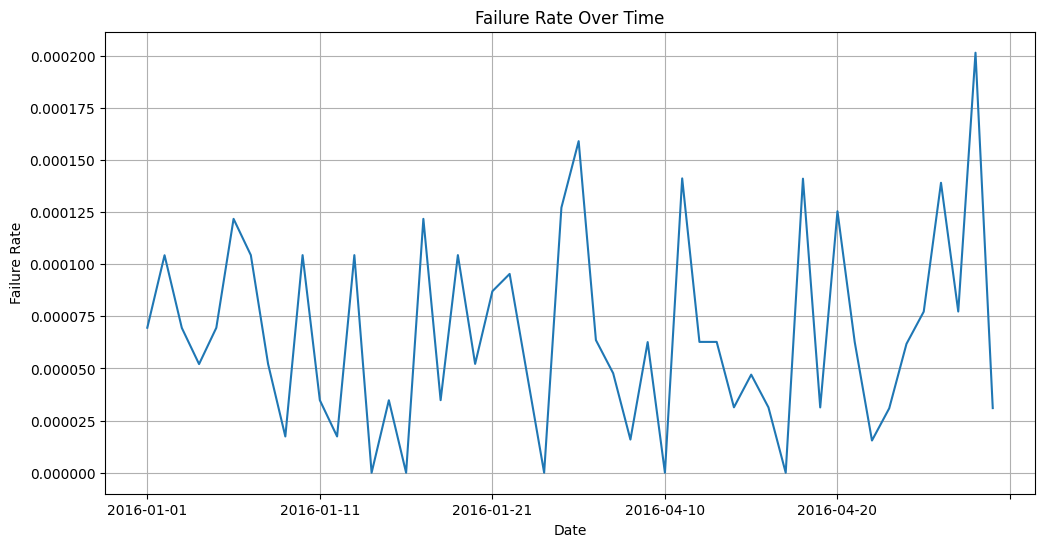

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

if 'date' in data.columns:
    plt.figure(figsize=(12, 6))
    data.groupby('date')['failure'].mean().plot()
    plt.title('Failure Rate Over Time')
    plt.xlabel('Date')
    plt.ylabel('Failure Rate')
    plt.grid(True)
    plt.show()
else:
    print("Date column not found in the dataset.")


/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: overflow encountered in divide
  f_indices = ((_unsigned_subtract(tmp_a, first_edge) / norm_denom)


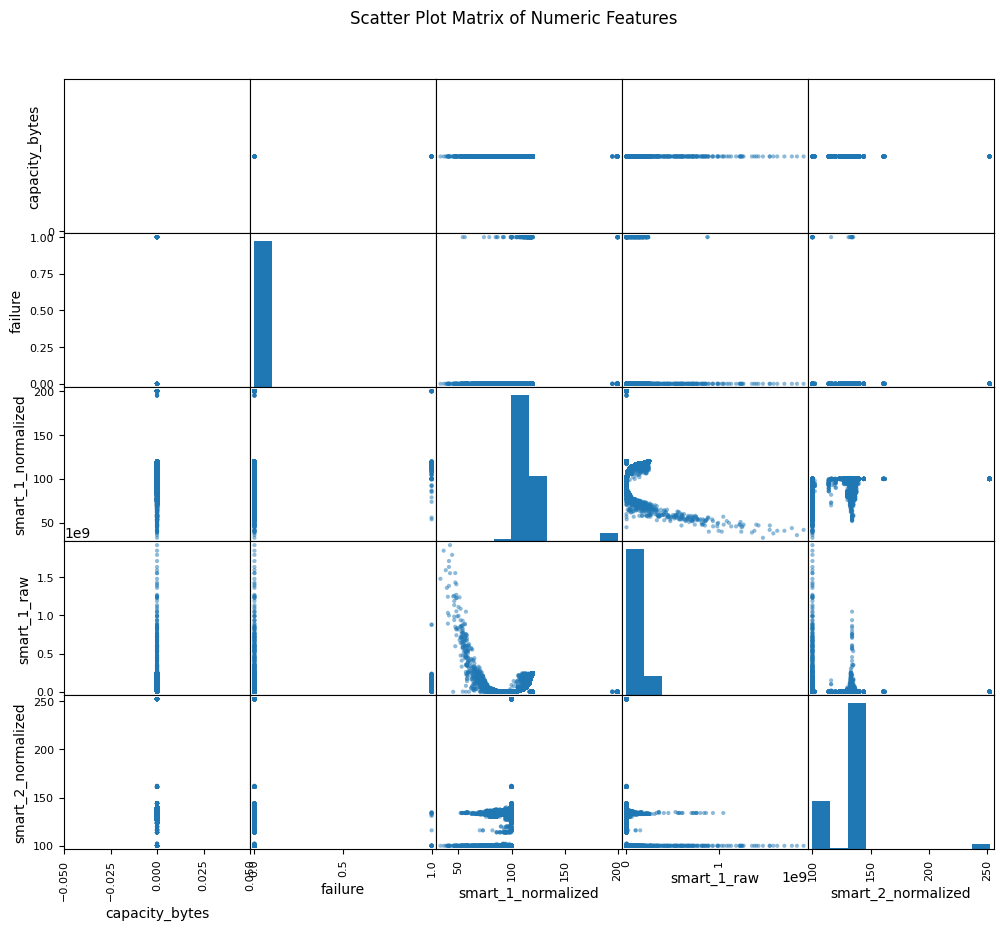

In [ ]:
from pandas.plotting import scatter_matrix

scatter_cols = numeric_data[:5]  # Select first 5 numeric columns for example
scatter_matrix(data[scatter_cols], figsize=(12, 10))
plt.suptitle('Scatter Plot Matrix of Numeric Features', y=0.95)
plt.show()


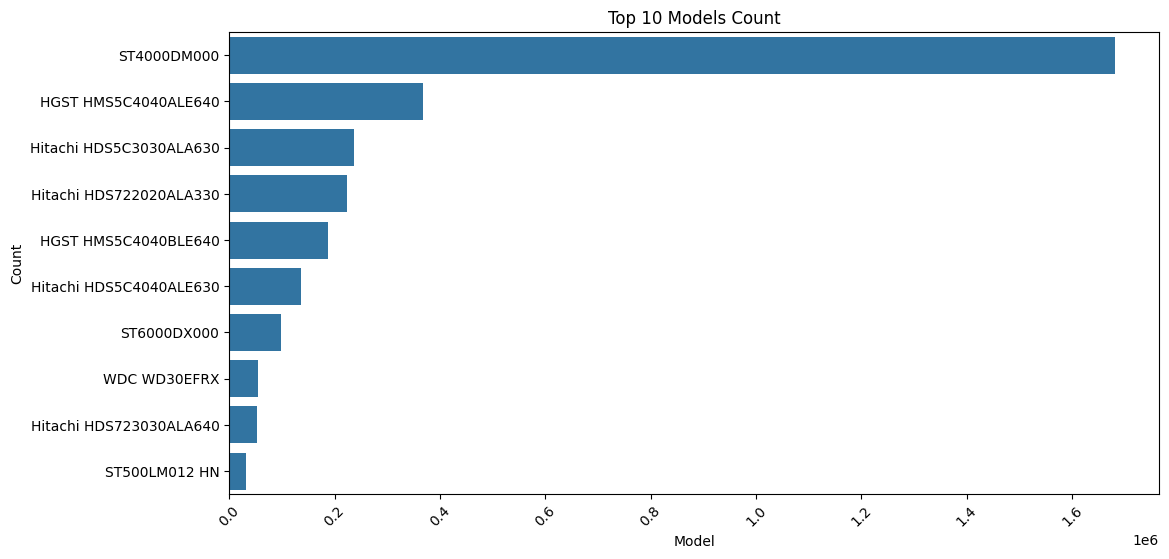

In [ ]:
if 'model' in data.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data['model'], order=data['model'].value_counts().index[:10])
    plt.title('Top 10 Models Count')
    plt.xticks(rotation=45)
    plt.xlabel('Model')
    plt.ylabel('Count')
    plt.show()
else:
    print("Model column not found in the dataset.")


### **STEP 4:** Prepare the Datasets

Split the dataset into training, validation and test sets. You can consider using [Cross validation split](https://scikit-learn.org/stable/modules/cross_validation.html)

In [ ]:
from sklearn.model_selection import train_test_split

if 'date' in data_processed.columns:
    data_processed.drop(columns=['date'], inplace=True)

data_processed = data_processed.select_dtypes(include=['float64', 'int64'])

# Split the dataset
train_data, remaining_data = train_test_split(data_processed, test_size=0.3, random_state=42)

test_size_relative = 0.1
val_size_relative = 0.2
test_data, val_data = train_test_split(remaining_data, test_size=val_size_relative, random_state=42)

Data types of the columns after filtering:
capacity_bytes          float64
failure                 float64
smart_1_normalized      float64
smart_1_raw             float64
smart_3_normalized      float64
smart_3_raw             float64
smart_4_normalized      float64
smart_4_raw             float64
smart_5_normalized      float64
smart_5_raw             float64
smart_7_normalized      float64
smart_7_raw             float64
smart_9_normalized      float64
smart_9_raw             float64
smart_10_normalized     float64
smart_10_raw            float64
smart_12_normalized     float64
smart_12_raw            float64
smart_183_normalized    float64
smart_183_raw           float64
smart_184_normalized    float64
smart_184_raw           float64
smart_187_normalized    float64
smart_187_raw           float64
smart_188_normalized    float64
smart_188_raw           float64
smart_189_normalized    float64
smart_189_raw           float64
smart_190_normalized    float64
smart_190_raw           float

In [ ]:
import tensorflow as tf

# Function to convert Pandas DataFrame to TensorFlow dataset
def create_tf_dataset(df):
    data_np = df.values
    dataset = tf.data.Dataset.from_tensor_slices((data_np, data_np))
    return dataset

# Create TensorFlow datasets for train, validation, and test sets
train_dataset = create_tf_dataset(train_data)
val_dataset = create_tf_dataset(val_data)
test_dataset = create_tf_dataset(test_data)

batch_size = 4
train_dataset = train_dataset.shuffle(buffer_size=len(train_data)).batch(batch_size)
val_dataset = val_dataset.batch(batch_size)
test_dataset = test_dataset.batch(batch_size)

## **TASK 2:** Build an Autoencoder

### **STEP 5:** Implement an Autoencoder

Build a standard [autoencoder](https://arxiv.org/pdf/2003.05991.pdf) or [Variational Autoencoder (VAE)](https://arxiv.org/abs/1606.05908) architecture for anomaly detection.

In [ ]:
!pip install tensorflow

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam


In [ ]:
input_dim = train_data.shape[1]

input_layer = Input(shape=(input_dim,))
encoder = Dense(64, activation="relu")(input_layer)
encoder = Dense(32, activation="relu")(encoder)
encoder = Dense(16, activation="relu")(encoder)
decoder = Dense(32, activation="relu")(encoder)
decoder = Dense(64, activation="relu")(decoder)
output_layer = Dense(input_dim, activation="sigmoid")(decoder)

autoencoder = Model(inputs=input_layer, outputs=output_layer)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss="mse")

autoencoder.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 95)]              0         
                                                                 
 dense (Dense)               (None, 64)                6144      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dense_3 (Dense)             (None, 32)                544       
                                                                 
 dense_4 (Dense)             (None, 64)                2112      
                                                                 
 dense_5 (Dense)             (None, 95)                6175  

### **STEP 6:** Experiment with Architectures

1. Design at least 3 different autoencoders for anomaly detection. Consider experimenting with:

    - Different layer types (Dense, LSTM for time series, Conv1D for sequential data)

    - Number of hidden layers and units

    - Activation functions (ReLU, sigmoid)

2. Choose appropriate evaluation metrics (e.g., reconstruction error, precision-recall) for anomaly classification.

3. Train the autoencoders using **the training set** and use **the validation set** to monitor the performance.

4. Plot the training loss & accuracy over epochs for each model.

5. Plot the validation loss & accuracy over epochs for each model.

6. Report other evaluation metrics such as precision, recall and [F1 score](https://en.wikipedia.org/wiki/F-score) for each model. You may use libraries like [scikit-learn](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html).

While you are welcome to experiment with various hyperparameters and setup, please include the three models that return the best result.

#### EXPERIMENT #1

Dense Layers

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def build_autoencoder_1(input_dim):
    model = Sequential()
    model.add(Dense(128, input_dim=input_dim, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(128, activation='relu'))
    model.add(Dense(input_dim, activation='sigmoid'))
    return model

input_dim = len(train_data.columns)
autoencoder_1 = build_autoencoder_1(input_dim)

autoencoder_1.compile(optimizer='adam', loss='mse')
autoencoder_1.summary()


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               6528      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 50)                6450      
                                                                 
Total params: 33746 (131.82 KB)
Trainable params: 3374

In [ ]:
history_1 = autoencoder_1.fit(train_dataset, epochs=2, validation_data=val_dataset)


Epoch 1/2
79483/79483 [==============================] - 533s 7ms/step - loss: 0.8052 - val_loss: 0.6208
Epoch 2/2
79483/79483 [==============================] - 463s 6ms/step - loss: 0.8082 - val_loss: 0.6276


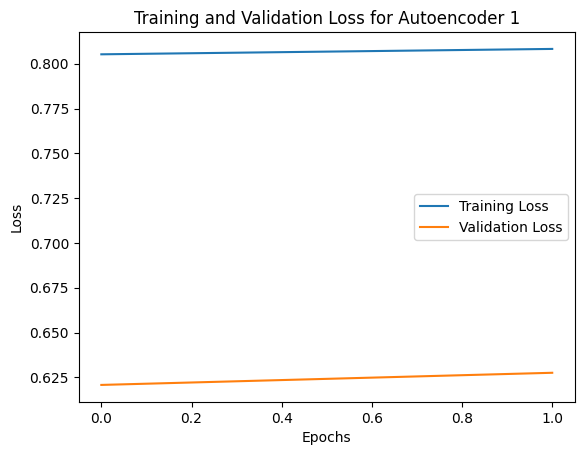

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(history_1.history['loss'], label='Training Loss')
plt.plot(history_1.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Autoencoder 1')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### EXPERIMENT #2

LSTM and Repeat vectors

In [ ]:
from tensorflow.keras.layers import LSTM, RepeatVector, TimeDistributed

timesteps = 10
input_dim = train_data.shape[1]

train_data = train_data[:len(train_data) - (len(train_data) % timesteps)]
val_data = val_data[:len(val_data) - (len(val_data) % timesteps)]
test_data = test_data[:len(test_data) - (len(test_data) % timesteps)]

train_data_lstm = train_data.values.reshape((-1, timesteps, input_dim))
val_data_lstm = val_data.values.reshape((-1, timesteps, input_dim))
test_data_lstm = test_data.values.reshape((-1, timesteps, input_dim))

def build_autoencoder_2(timesteps, input_dim):
    model = Sequential()
    model.add(LSTM(64, activation='relu', input_shape=(timesteps, input_dim), return_sequences=True))
    model.add(LSTM(32, activation='relu', return_sequences=False))
    model.add(RepeatVector(timesteps))
    model.add(LSTM(32, activation='relu', return_sequences=True))
    model.add(LSTM(64, activation='relu', return_sequences=True))
    model.add(TimeDistributed(Dense(input_dim)))
    return model

autoencoder_2 = build_autoencoder_2(timesteps, input_dim)
autoencoder_2.compile(optimizer='adam', loss='mse')
autoencoder_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 64)            29440     
                                                                 
 lstm_1 (LSTM)               (None, 32)                12416     
                                                                 
 repeat_vector (RepeatVecto  (None, 10, 32)            0         
 r)                                                              
                                                                 
 lstm_2 (LSTM)               (None, 10, 32)            8320      
                                                                 
 lstm_3 (LSTM)               (None, 10, 64)            24832     
                                                                 
 time_distributed (TimeDist  (None, 10, 50)            3250      
 ributed)                                             

In [ ]:
history_2 = autoencoder_2.fit(train_data_lstm, train_data_lstm,
                              epochs=2,
                              batch_size=4,
                              validation_data=(val_data_lstm, val_data_lstm),
                              shuffle=True)


Epoch 1/2
4769/4769 [==============================] - 385s 80ms/step - loss: 0.8320 - val_loss: 0.7267
Epoch 2/2
4769/4769 [==============================] - 363s 76ms/step - loss: 1.2071 - val_loss: 0.7020


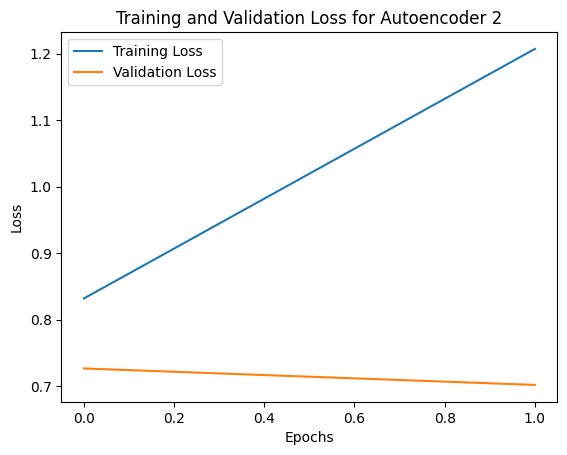

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_2.history['loss'], label='Training Loss')
plt.plot(history_2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Autoencoder 2')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### EXPERIMENT #3

Conv1D

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, UpSampling1D, InputLayer
import numpy as np

def build_autoencoder_3(input_dim):
    model = Sequential()
    model.add(InputLayer(input_shape=(input_dim, 1)))

    # Encoder
    model.add(Conv1D(32, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(2, padding='same'))  # Halve size
    model.add(Conv1D(16, 3, activation='relu', padding='same'))

    # Bottleneck
    model.add(Conv1D(8, 3, activation='relu', padding='same'))

    # Decoder
    model.add(Conv1D(16, 3, activation='relu', padding='same'))
    model.add(UpSampling1D(2))  # Double size
    model.add(Conv1D(32, 3, activation='relu', padding='same'))
    model.add(Conv1D(1, 3, activation='sigmoid', padding='same'))

    return model
r
train_data_conv = np.expand_dims(train_data.values, axis=2)
val_data_conv = np.expand_dims(val_data.values, axis=2)
test_data_conv = np.expand_dims(test_data.values, axis=2)

print(f"Train data shape: {train_data_conv.shape}")
print(f"Validation data shape: {val_data_conv.shape}")
print(f"Test data shape: {test_data_conv.shape}")

input_dim = train_data.shape[1]
autoencoder_3 = build_autoencoder_3(input_dim)
autoencoder_3.compile(optimizer='adam', loss='mse')
autoencoder_3.summary()

history_3 = autoencoder_3.fit(train_data_conv, train_data_conv,
                              epochs=5,
                              batch_size=16,
                              validation_data=(val_data_conv, val_data_conv),
                              shuffle=True)


Train data shape: (317929, 50, 1)
Validation data shape: (317930, 50, 1)
Test data shape: (953789, 50, 1)
Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_66 (Conv1D)          (None, 50, 32)            128       
                                                                 
 max_pooling1d_16 (MaxPooli  (None, 25, 32)            0         
 ng1D)                                                           
                                                                 
 conv1d_67 (Conv1D)          (None, 25, 16)            1552      
                                                                 
 conv1d_68 (Conv1D)          (None, 25, 8)             392       
                                                                 
 conv1d_69 (Conv1D)          (None, 25, 16)            400       
                                                                 
 up_sampling1

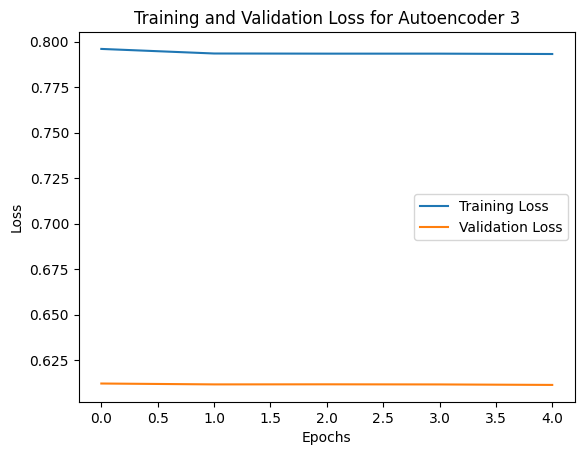

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_3.history['loss'], label='Training Loss')
plt.plot(history_3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss for Autoencoder 3')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


#### QUESTION 2
Describe the details of your autoencoders, including the layers, activation functions, and any specific configurations employed.

Experiment 1:
Uses fully connected dense layers. 3 Dense layers in encoders, 2 in decoders and 1 for output.

Experiment 2:
Uses LSTM autoencoders and repeat vectors.
Activation function : ReLU(encoder)  Optimizer: Adam   Loss function: MSE   

Experiment 3:
Uses Conv 1D autoencoder.
Activation function : ReLU(encoder), Sigmoid(decoder)     Optimizer: Adam   Loss function: MSE  Epochs=5  

### **STEP 7:** Evaluate the Models

1. Compare the performance of the different architectures based on the metrics obtained from the validation set.

2. Save the weights of the final model that provides the best results.

3. Evaluate the best model using **the test set**.

4. Report the loss and accuracy on the test set.

5. Generate a confusion matrix using the predictions on the test set.

6. Report other evaluation metrics such as precision, recall and F1 score.

In [ ]:
# Save the weights of the best model
autoencoder_3.save_weights(f"autoencoder_3_weights.pkl")
print(f"Saved weights of the best model")

Saved weights of the best model


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

def evaluate_model(autoencoder, test_data, threshold):
    test_reconstructed = autoencoder.predict(test_data)

    reconstruction_error = np.mean(np.power(test_data - test_reconstructed, 2), axis=1)

    anomalies = reconstruction_error > threshold

    return anomalies, reconstruction_error


29806/29806 [==============================] - 139s 5ms/step
Reconstruction error threshold: 78.05106618559383
Reconstruction error for autoencoder_3:  [[0.14299923]
 [0.27028771]
 [0.13061653]
 ...
 [0.02973545]
 [0.06488354]
 [0.05215144]]
Anamolies for autoencoder_3:  [[0.14299923]
 [0.27028771]
 [0.13061653]
 ...
 [0.02973545]
 [0.06488354]
 [0.05215144]]


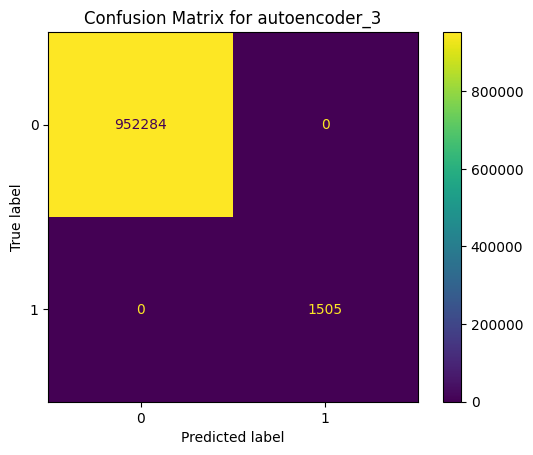

In [ ]:
autoencoder_3.load_weights(f"autoencoder_3_weights.pkl")
anomalies, reconstruction_error = evaluate_model(autoencoder_3, test_data_conv, threshold)

threshold = np.mean(reconstruction_error) + 3 * np.std(reconstruction_error)
print("Reconstruction error threshold:", threshold)
print(f"Reconstruction error for autoencoder_3: ", reconstruction_error)
print(f"Anamolies for autoencoder_3: ", reconstruction_error)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ground_truth = np.array([0] * (test_data.shape[0] - anomalies) + [1] * anomalies)

cm = confusion_matrix(ground_truth, anomalies)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title(f"Confusion Matrix for autoencoder_3")
plt.show()


In [ ]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

precision, recall, f1, _ = precision_recall_fscore_support(ground_truth, anomalies, average='binary')
accuracy = accuracy_score(ground_truth, anomalies)

print(f"Test Metrics for autoencoder_3:")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"Accuracy: {accuracy}")


Test Metrics for autoencoder_3:
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Accuracy: 1.0


#### QUESTION 3
Discuss the graphs and results obtained from the training and evaluation steps.

 Experiment 1 has a slight increase in validation loss as epoch increase.
 Experiment 2 has high loss copared to other 2 setups.
 Experiment 3 appears to have a slightly better performance as its validation loss remains constant and its training loss decreases slightly.

#### QUESTION 4
Determine which architecture performs best and why (consider factors like reconstruction error and anomaly detection accuracy).

Experiment 3 is the best model due to its stable validation loss and slight improvement in training loss